Import Library yg diperlukan seperti pandas, numpy, matplotlib dan wordcloud.

In [94]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

import folium


## Import Data

Membuat variabel Datanya menjadi crime_london

In [95]:
crime_london = pd.read_csv('london_crime_by_lsoa.csv')

Melihat data awal beserta kolomnya

In [96]:
crime_london.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


## Menghapus Kolom
Menghapus kolom lsoa_code

In [97]:
crime_london.drop(["lsoa_code"], axis=1, inplace=True)

Note: 
1. axis=1 untuk menandakan bahwa yang dihapus adalah kolom
2. inplace=True untuk mengubah data secara tetap

In [98]:
crime_london.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


## Rename
Mengganti nama kolom value dikarenakan memiliki makna yang rancu

In [99]:
crime_london.rename(columns={"value" : "total", "borough": "location"}, inplace=True)

In [100]:
crime_london.head()

,location,major_category,minor_category,total,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


## Deskripsi
Menampilkan Deskripsi pada data untuk melihat informasi lebih detail

In [101]:
crime_london.describe()

,total,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


## Data Null
Sebelum mengolah data pastikan terlebih dahulu data null pada data

In [102]:
crime_london.isnull().sum()

location          0
major_category    0
minor_category    0
total             0
year              0
month             0
dtype: int64

## Beberapa keunikan Data

Nilai unik pada location mendefinisikan beberapa wilayah

In [103]:
crime_london['location'].unique()

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

Nilai unik pada minor_category mendefinisikan kejahatan minor

In [104]:
crime_london['minor_category'].unique()

array(['Burglary in Other Buildings', 'Other violence',
       'Personal Property', 'Other Theft', 'Offensive Weapon',
       'Criminal Damage To Other Building', 'Theft/Taking of Pedal Cycle',
       'Motor Vehicle Interference & Tampering',
       'Theft/Taking Of Motor Vehicle', 'Wounding/GBH',
       'Other Theft Person', 'Common Assault', 'Theft From Shops',
       'Possession Of Drugs', 'Harassment', 'Handling Stolen Goods',
       'Criminal Damage To Dwelling', 'Burglary in a Dwelling',
       'Criminal Damage To Motor Vehicle', 'Other Criminal Damage',
       'Counted per Victim', 'Going Equipped', 'Other Fraud & Forgery',
       'Assault with Injury', 'Drug Trafficking', 'Other Drugs',
       'Business Property', 'Other Notifiable', 'Other Sexual',
       'Theft From Motor Vehicle', 'Rape', 'Murder'], dtype=object)

Nilai unik pada minor_category mendefinisikan kejahatan major

In [105]:
crime_london['major_category'].unique()

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

## Mnampilkan jumlah keunikan Data

In [106]:
crime_london['location'].nunique()



33

In [107]:
crime_london['minor_category'].nunique()

32

In [108]:
crime_london['major_category'].nunique()

9

## Visualisasi Data

In [109]:
crime_london.head(2)

,location,major_category,minor_category,total,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11


1. Mengelompokkan data berdasarkan minor_category dan year
2. Data dibatasi dari tahun 2013 seterusnya

In [110]:
crime_minor = crime_london[(crime_london['year'] >= 2013)].groupby(['minor_category', 'year'])['total'].sum()
crime_minor

minor_category               year
Assault with Injury          2013    39929
                             2014    45677
                             2015    48164
                             2016    50038
Burglary in Other Buildings  2013    30685
                                     ...  
Theft/Taking of Pedal Cycle  2016    18001
Wounding/GBH                 2013    15526
                             2014    21556
                             2015    23431
                             2016    23525
Name: total, Length: 128, dtype: int64

Membuat variabel masing masing minor_crime untuk mengelompokkan masing masing minor_crime beserta tahunnya

In [111]:
minor1 = crime_minor['Assault with Injury'].to_frame()
minor1.rename(columns={'total':'Assault with Injury'}, inplace = True)
print(minor1)
print('\n')
minor2 = crime_minor['Burglary in Other Buildings'].to_frame()
minor2.rename(columns={'total':'Burglary in Other Buildings'}, inplace = True)
print(minor2)
print('\n')
minor3 = crime_minor['Theft/Taking of Pedal Cycle'].to_frame()
minor3.rename(columns={'total':'Theft/Taking of Pedal Cycle'}, inplace = True)
print(minor3)
print('\n')
minor4 = crime_minor['Wounding/GBH'].to_frame()
minor4.rename(columns={'total':'Wounding/GBH'}, inplace = True)
print(minor4)

      Assault with Injury
year                     
2013                39929
2014                45677
2015                48164
2016                50038


      Burglary in Other Buildings
year                             
2013                        30685
2014                        27078
2015                        25833
2016                        25289


      Theft/Taking of Pedal Cycle
year                             
2013                        18708
2014                        17186
2015                        16513
2016                        18001


      Wounding/GBH
year              
2013         15526
2014         21556
2015         23431
2016         23525


## Mengubah data menjadi tabel
Mengubah data minor_category menjadi tabel dan disimpan kedalam variabel minor_crime

In [112]:
minor_crime = pd.concat([minor1,minor2,minor3,minor4], axis=1)

In [113]:
minor_crime

,Assault with Injury,Burglary in Other Buildings,Theft/Taking of Pedal Cycle,Wounding/GBH
year,,,,
2013,39929,30685,18708,15526
2014,45677,27078,17186,21556
2015,48164,25833,16513,23431
2016,50038,25289,18001,23525


## Line Plot

Note: 
1. kind untuk menampilkan jenis plot
2. figsize untuk mengatur ukuran canvas plot

Text(0.5, 0, 'Years')

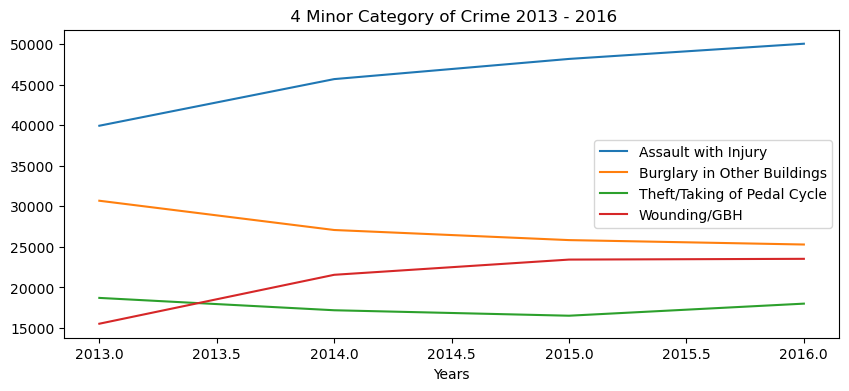

In [114]:
minor_crime.plot(
    kind='line',
    figsize=(10,4),
)
plt.title(" 4 Minor Category of Crime 2013 - 2016")
plt.xlabel("Years")

## Area Plot

Note: 
1. Mengubah kind menjadi 'area'
2. Alpha untuk opasitas warna agar tidak terlalu kontras
3. stacked agar tidak saling menimpa grafik dibawah nya, biar lebih terlihat

Text(0.5, 0, 'Years')

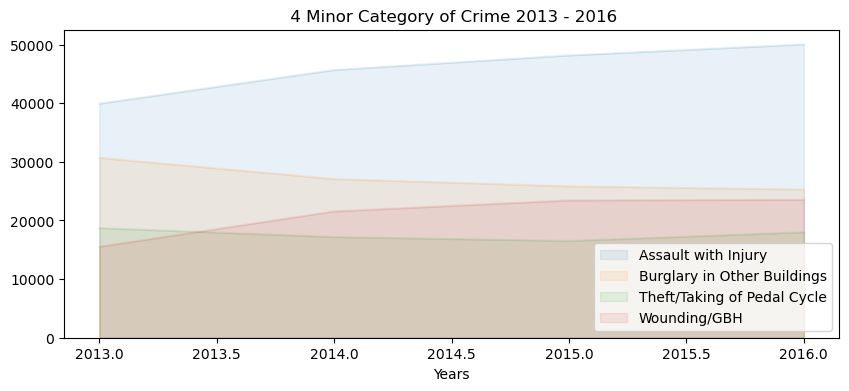

In [115]:
minor_crime.plot(
    kind='area',
    figsize=(10,4),
    alpha=0.10,
    stacked=False,

)
plt.title(" 4 Minor Category of Crime 2013 - 2016")
plt.xlabel("Years")

## Histogram

Menampilkan total pada masing masing location dari retang tahun 2013 sampai 2016 untuk ditampilkan menggunakan plot Histogram

In [116]:
hist1 = crime_london[(crime_london['year'] == 2013)].groupby(['location'])[['total']].sum()
hist2 = crime_london[(crime_london['year'] == 2014)].groupby(['location'])[['total']].sum()
hist3 = crime_london[(crime_london['year'] == 2015)].groupby(['location'])[['total']].sum()
hist4 = crime_london[(crime_london['year'] == 2016)].groupby(['location'])[['total']].sum()

hist1.rename(columns={'total':'2013'},inplace=True)
hist2.rename(columns={'total':'2014'},inplace=True)
hist3.rename(columns={'total':'2015'},inplace=True)
hist4.rename(columns={'total':'2016'},inplace=True)

hist = pd.concat([hist1,hist2,hist3,hist4],axis=1)
hist

,2013,2014,2015,2016
location,,,,
Barking and Dagenham,15759,15426,16346,16741
Barnet,22510,22572,24036,24684
Bexley,11552,11844,11990,12840
Brent,23759,24426,24883,26693
Bromley,18945,19668,20637,20164
Camden,28435,27198,29477,29183
City of London,110,115,151,178
Croydon,27444,27357,28089,28712
Ealing,25917,24978,26247,27127


<Axes: ylabel='Frequency'>

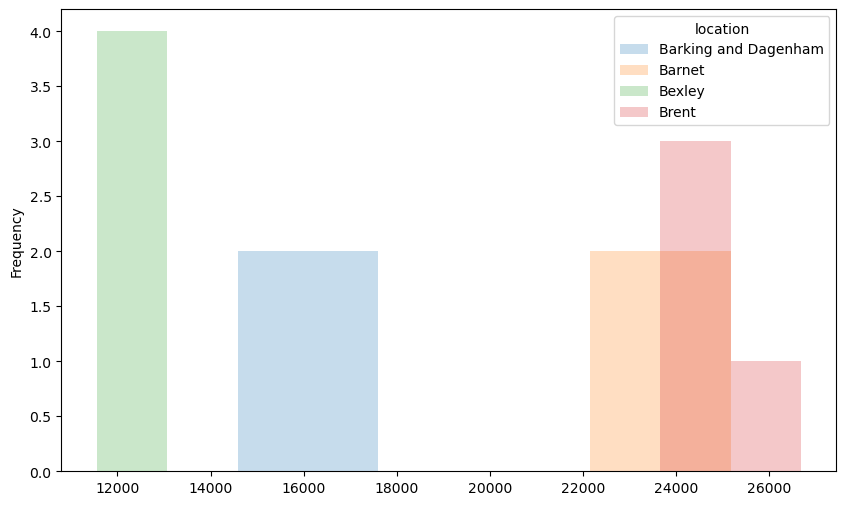

In [117]:
hist.loc[['Barking and Dagenham','Barnet', 'Bexley','Brent']].T.plot(
    kind='hist',
    figsize=(10,6),
    alpha=0.25,
)

Pada Histogram tersebut menampilkan persebaran data pada masing masing lokasi 'Barking and Dagenham','Barnet', 'Bexley', dan 'Brent'.
kita ambil contoh pada lokasi Barking and Dagenham terdapat 4 data pada rentang < 1200 sampai 1300 pada tahun 2013 - 2016. Dan pada lokasi lainnya menyusul dibawah Barking and Dagenham dengan rentang masing masing lokasinya.

## Bar Chart

In [118]:
bar1 = crime_london['minor_category'].value_counts()
barhead = bar1.head(15)

bar2 = crime_london['minor_category'].value_counts()
bartail = bar2.tail(15)

Code diatas bertujuan mengambil sampel data 15 teratas dengan variabel barhead, dan 15 terbawah dengan variabel bartail untuk mengetahui masing masing teratas dan terbawah berasal dari lokasi mana dan berapa total tiap kejahatan masing masing lokasi.

Text(0, 0.5, 'Location minor category')

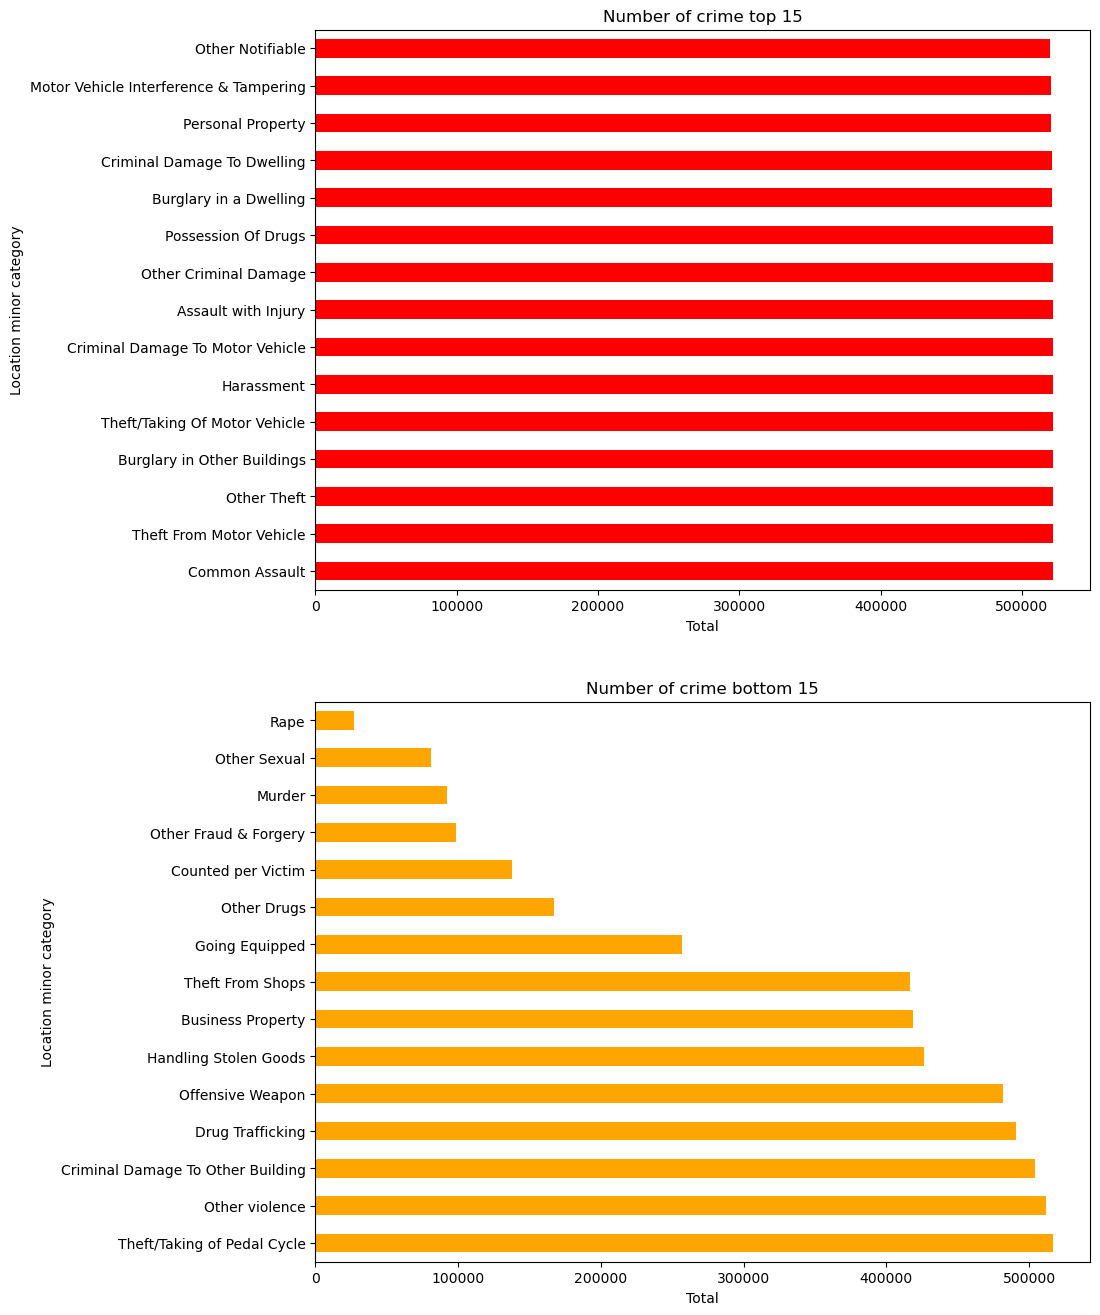

In [119]:
fig = plt.figure()

ax0 = fig.add_subplot(2,1,1)
ax1 = fig.add_subplot(2,1,2)



barhead.plot(kind="barh",
             figsize=(10,16),
             ax=ax0,
             color="red"
)
ax0.set_title("Number of crime top 15")
ax0.set_xlabel("Total")
ax0.set_ylabel("Location minor category")

bartail.plot(
    kind='barh',
    figsize=(10,16),
    ax=ax1,
    color="orange"
)
ax1.set_title("Number of crime bottom 15")
ax1.set_xlabel("Total")
ax1.set_ylabel("Location minor category")

Menurut tampilan bar tersebut bahwa Common Assult merupakan kejahatan yang tertinggi berdasarkan minor_category of crime. Dan Rape Merupakan nilai terendah.

## Pie Chart

In [120]:
crime_london.head(3)

,location,major_category,minor_category,total,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5


Pada code dibawah ini saya mengambil dua kolom yaitu kolom location dan total kejahatan pada masing masing wilayah. Pada data ini saya simpan kedalam variabel location

In [121]:
location = crime_london.groupby(['location'])[['total']].sum()

location

,total
location,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


Reset index, karena sebelumnya wilayah menjadi index secara default.

In [122]:
location = crime_london.groupby(['location'])[['total']].sum().reset_index()

location

,location,total
0,Barking and Dagenham,149447
1,Barnet,212191
2,Bexley,114136
3,Brent,227551
4,Bromley,184349
5,Camden,275147
6,City of London,780
7,Croydon,260294
8,Ealing,251562
9,Enfield,193880


Pada code dibawah ini, saya memilih 5 teratas kejahatan terbanyak sesuai lokasi kejahatannya.

In [123]:
location_teratas = location.sort_values(['total'], ascending=False)

location_teratas_5 = location_teratas.head(5)

location_teratas_5

,location,total
32,Westminster,455028
21,Lambeth,292178
27,Southwark,278809
5,Camden,275147
24,Newham,262024


In [124]:
location_teratas_5 = location_teratas_5.groupby('location', axis=0).sum()
location_teratas_5

,total
location,
Camden,275147
Lambeth,292178
Newham,262024
Southwark,278809
Westminster,455028


Pada code diatas saya mengurutkan 5 data teratas dari location yang saya simpan di variabel location_teratas_5. lalu saya jadikan kolom location menjadi index agar tampilan pie dibawah ditampilkan nama masing masing lokasi kejahatan.

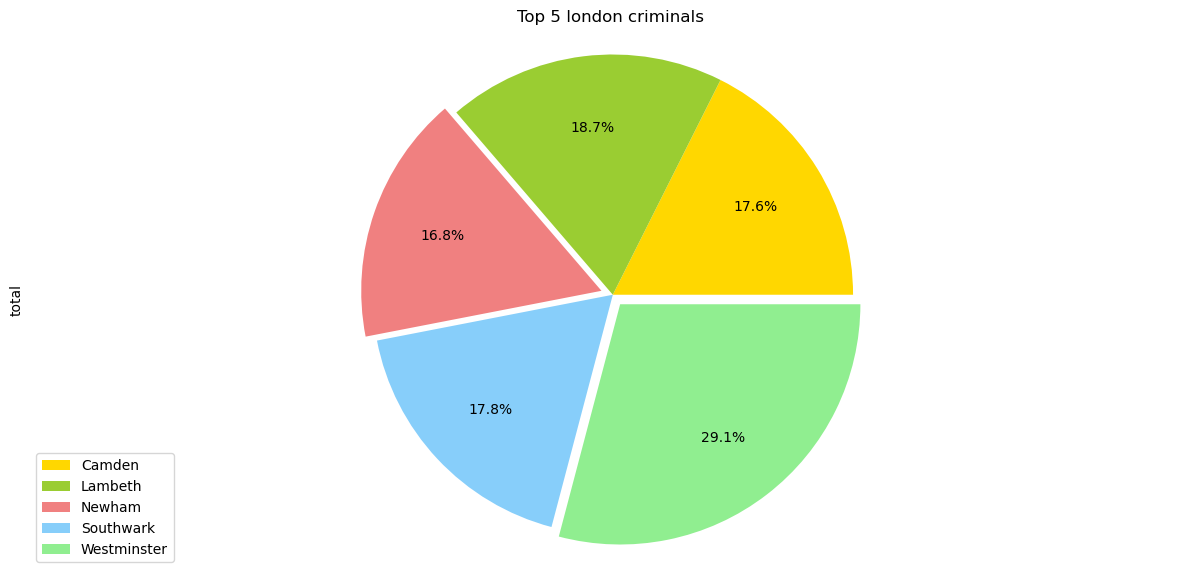

In [125]:
color_list = ["gold", "yellowgreen", "lightcoral", "lightskyblue", "lightgreen", "pink"]
location_teratas_5['total'].plot(
    kind='pie',
    labels= None,
    figsize=(15,7),
    autopct='%1.1f%%',
    pctdistance=0.7,
    explode =[0,0,.05,0,.05],
    colors=color_list
)
plt.title("Top 5 london criminals")
plt.axis('equal')
plt.legend(labels=location_teratas_5.index, loc='lower left')

Pada Pie chart diatas dijelaskan bahwa wilayah Westminster merupakan kejahatan terbanyak yg mencapai 29% dibandingkan wilayah lainnya.

## Box plot

In [126]:
location_teratas_5

,total
location,
Camden,275147
Lambeth,292178
Newham,262024
Southwark,278809
Westminster,455028


Pada code dibawah ini, membuat dataframe dengan mengambil dua lokasi dari dataframe crime_london dengan pengelompokkan location dan year. Data yang diambil rentang tahun 2010 dan seterusnya.

In [127]:
crime_box = crime_london[(crime_london['year'] >= 2010)].groupby(['location','year'])['total'].sum()
crime_box

location              year
Barking and Dagenham  2010    17130
                      2011    16686
                      2012    15990
                      2013    15759
                      2014    15426
                              ...  
Westminster           2012    59226
                      2013    53852
                      2014    47564
                      2015    47395
                      2016    48330
Name: total, Length: 231, dtype: int64

Selanjutnya membuat data tabel dari kedua lokasi, secara default kolom bertuliskan total, lalu direname sesuai dengan nama lokasi kejahatan. Dataframe tersebut disimpan pada variabel CamdenSouthwark

In [128]:
location1 = crime_box['Camden'].to_frame()
location2 = crime_box['Southwark'].to_frame()


location1.rename(columns = {'total':'Camden'}, inplace = True)
location2.rename(columns = {'total':'Southwark'}, inplace = True)

CamdenSouthwark = pd.concat([location1,location2], axis=1)
CamdenSouthwark

,Camden,Southwark
year,,
2010,31804,31320
2011,33956,30723
2012,31472,30737
2013,28435,31128
2014,27198,28912
2015,29477,30260
2016,29183,31636


Text(0, 0.5, 'Total of Crime')

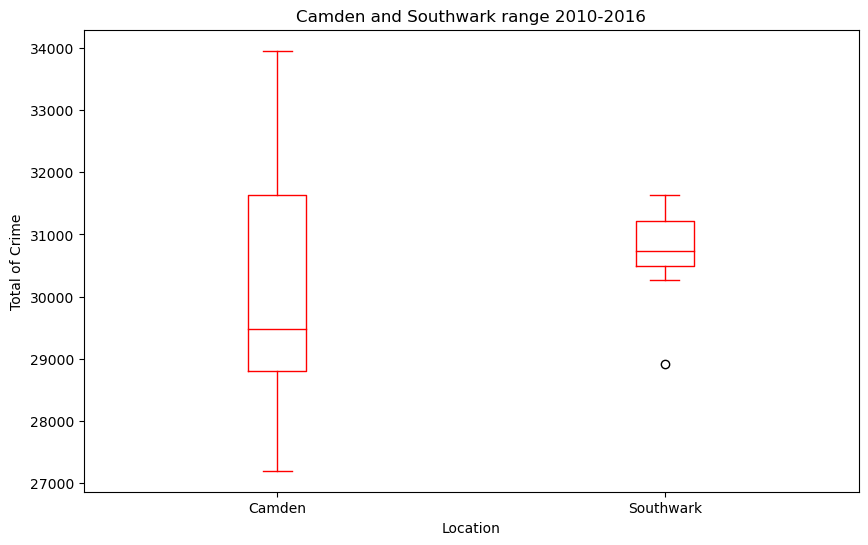

In [129]:
CamdenSouthwark.plot(
    kind='box',
    figsize=(10,6),
    color='red'
)

plt.title('Camden and Southwark range 2010-2016')
plt.xlabel('Location')
plt.ylabel('Total of Crime')

Alasan saya mengambil wilayah Camden dan Southwark dikarenakan perbandingan dari kedua wilayah tersebut tidak terlalu jauh.
Dari Boxplot tersebut kedua wilayah tersebut Camden dan Southwark memiliki jarak pesebaran yang berbeda. Pada wilayah Camden kurang lebih 34000 kejahatan dan Southwark berhenti diangka kurang dari 32000 kejahatan. Dan ternyata, pada wilayah Southmark memiliki data yg jauh dibawah dengan angka 28912 pada persebaran nilai kejahatan wilayah nya.

In [130]:
CamdenSouthwark.describe()

,Camden,Southwark
count,7.000000,7.000000
mean,30217.857143,30673.714286
std,2308.691941,897.337305
min,27198.000000,28912.000000
25%,28809.000000,30491.500000
50%,29477.000000,30737.000000
75%,31638.000000,31224.000000
max,33956.000000,31636.000000


## Scatter Plot

Dikarenakan menggunakan Scatter plot saya mengambil banyak data dari berbagai wilayah, yaitu minor_category. Data saya ambil tahun 2016 kebelakang dan saya simpan di variabel years

In [131]:
years = crime_london[(crime_london['year'] <=2016)].groupby(['minor_category','year'])['total'].sum()

In [132]:
years

minor_category       year
Assault with Injury  2008    56586
                     2009    55297
                     2010    54173
                     2011    50768
                     2012    50369
                             ...  
Wounding/GBH         2012     7151
                     2013    15526
                     2014    21556
                     2015    23431
                     2016    23525
Name: total, Length: 288, dtype: int64

Menambahkan Theft From Motor Vehicle kedalam DataFrame lalu mengganti nama kolom berdasarkan tindak kejahatannya. Lalu Reset index. Semua data tersebut disimpan ke variabel total_yearly

In [133]:
total_yearly = years['Theft From Motor Vehicle'].to_frame()
total_yearly.rename(columns={'total':'Theft From Motor Vehicle'}, inplace=True)
total_yearly.reset_index(inplace=True)
total_yearly

,year,Theft From Motor Vehicle
0,2008,76570
1,2009,68856
2,2010,69709
3,2011,69604
4,2012,68198
5,2013,63509
6,2014,52167
7,2015,50024
8,2016,51319


Text(0, 0.5, 'Number of Criminals')

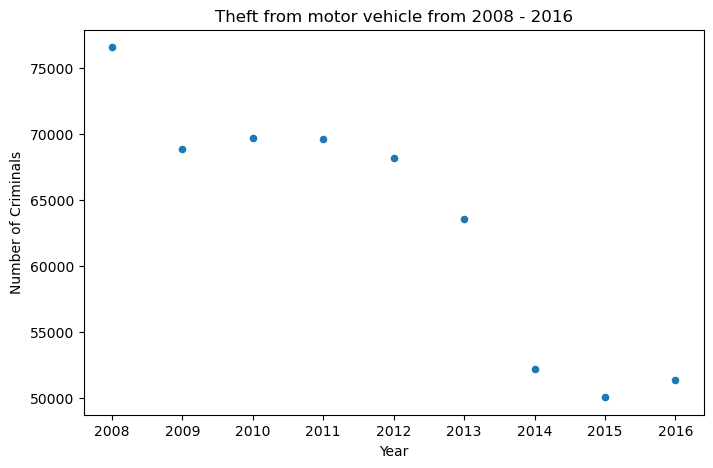

In [134]:
ax = total_yearly.plot(
    kind='scatter',
    figsize=(8,5),
    x='year',
    y='Theft From Motor Vehicle',
)
ax.set_title('Theft from motor vehicle from 2008 - 2016')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Criminals')

Pada Scatter plot diatas disimpulkan bahwa hubungan disetiap tahun dimulai dari tahun 2009 sampai 2012. Pada tahun tahun tersebut stabil dalam kejahatan Theft From Motor Vehicle.

## Word Cloud

Pada Word Cloud ini saya menggunakan semua data wilayah yaitu kolom location untuk melihat wilayah mana yang paling sering muncul. Pada kondisi ini terdapat wilayah dengan spasi. Pada nama wilayah yang berspasi disimpan pada variabel text.

<function matplotlib.pyplot.show(close=None, block=None)>

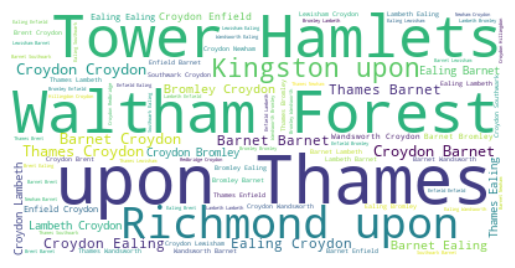

In [135]:
# stopwords = set(STOPWORDS)
location_cloud = crime_london['location']

text =' '.join(location_cloud)
locWC = WordCloud(
    background_color='white', 
    max_words=500,
    # stopwords=stopwords
).generate(text)

plt.imshow(locWC, interpolation='bilinear')
plt.axis('off')
plt.show

## Folium Maps

In [139]:
london_city = folium.Map(
    location=[51.49740921718516, -0.13624287457327522],
    zoom_start=12,
)
london_city

Folium Map tersebut menampilkan kota martubung dengan zoom 20. Pada folium ini menggunakan tampilan sederhana agar cepat untuk di load.

## Kesimpulan 
Menurut analisis saya dapat disimpulkan bahwa data kriminal london dalam rentang tahun 2008 sampai 2016 dan didata disetiap bulannya berbeda beda. Hampir ada keterkaitan antar wilayah dan variabelnya tetapi tidak mempengaruhi beberapa wilayah yang lain. Westminster merupakan wilayah yang paling tinggi kejahatan.
